### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

The taylor Expansion of the cosine is:

$$\cos(x) = 1 - \frac{x^2}{2} + O(x^3).$$

So I choose to sample the integral with distribution:
$$d(x) = 1 - x^2.$$
This must be normalized so that $\int_0^1 d(x) \,dx = 1$:
$$\int_0^1 \left(1 - x^2\right) \,dx = \left(x - \frac{x^3}{3}\right)\bigg|_0^1 = \frac{2}{3} \quad \implies \quad d(x) = \frac{3}{2}\left(1 - x^2\right).$$
Inverting the cumulative distribution requires solving a cubic equation, so I resort to accept-reject to sample $d(x)$.
$$y = F(x) = \int_0^x dx' d(x') \rightarrow x = F^{-1}(y)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

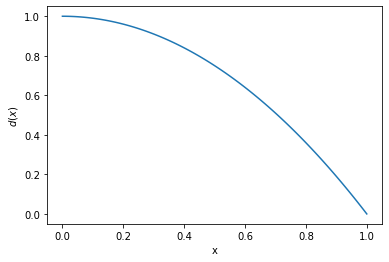

In [36]:
x = np.linspace(0, 1,100)
y = 1 - x**2
plt.xlabel('x')
plt.ylabel('$d(x)$')
plt.plot(x, y)

Text(0.5, 1.0, 'Monte Carlo integration (uniform sampling)')

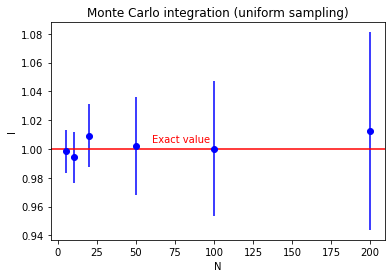

In [6]:
import numpy as np
import matplotlib.pyplot as plt
uniform = np.loadtxt('data/exercise-02.1-uniform.dat')
plt.errorbar(uniform[:,0], uniform[:,1], yerr=uniform[:,2], fmt='bo')
plt.axhline(y = 1, color = 'red', linestyle = '-')
plt.text(60, 1+0.005, 'Exact value', color='red')
plt.xlabel('N')
plt.ylabel('I')
plt.title('Monte Carlo integration (uniform sampling)')

Text(0.5, 1.0, 'Monte Carlo integration (importance sampling)')

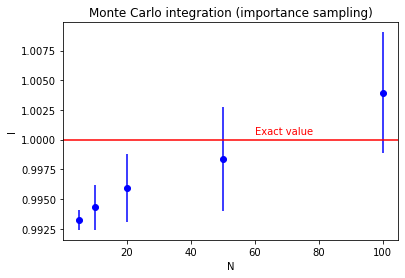

In [33]:
importance = np.loadtxt('data/exercise-02.1-importance.dat')
plt.errorbar(importance[:5,0], importance[:5,1], yerr=importance[:5,2], fmt='bo')
plt.axhline(y = 1, color = 'red', linestyle = '-')
plt.text(60, 1+0.0005, 'Exact value', color='red')
plt.xlabel('N')
plt.ylabel('I')
plt.title('Monte Carlo integration (importance sampling)')

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?